In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_exercise_train.csv')
download_file(test_data_url, 'module5_exercise_test.csv')

Downloaded module5_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_train.csv
Downloaded module5_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/exercise/module5_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")
df_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

### Data analysis

In [ ]:
#### Make a complete analysis on data preprocessing
# Inconsistencies
# Duplicates (data.duplicated().sum())
# Missing values (data.isnull().sum())
# Categorical
# Outliers
# Feature Engineering
# Feature Selection and/or Dimensionality Reduction

In [4]:
data = pd.concat([df_train, df_test], axis=0)

In [5]:
df_train.shape

(1909, 16)

In [6]:
df_test.shape

(365, 15)

In [7]:
def plot_feature_over_time(df, feature, date_id_start, date_id_end):
    df_filtered = df[(df['date'] >= date_id_start) & (df['date'] <= date_id_end)]

    if feature not in df_filtered.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['date'], df_filtered[feature], label=feature, linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.title(f'{feature} from {date_id_start} to {date_id_end}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data

,date,weather_condition,humidity,wind_speed,oil_brent_price_indicator,temperature_station1,temperature_station2,temperature_station3,temperature_station4,temperature_station5,temperature_station6,temperature_station7,temperature_station8,temperature_station9,temperature_station10,electricity_demand
0,2015-01-08,Cloudy,69.304377,27.74 km/h,Moderate,0.369411,NaN,0.159977,0.118224,-0.444455,0.313675,0.106192,0.369430,1.279470,-0.384661,273.511353
1,2015-01-09,Sunny,55.955975,21.78 km/h,Moderate,2.009903,NaN,1.617242,NaN,2.160063,2.515627,1.867474,1.953165,1.878233,1.582365,258.827085
2,2015-01-10,Rainy,62.701614,6.83 m/s,Moderate,-2.603544,-2.422001,-3.685819,-2.392354,-1.936704,-2.950332,-3.074828,-2.698650,-2.354860,-2.770883,302.535033
3,2015-01-11,Snowy,60.375001,5.79 m/s,Moderate,-3.789836,-3.974054,-3.217545,-4.397143,-3.375188,-3.650454,-5.004991,-3.233724,-4.227899,NaN,296.270989
4,2015-01-12,Snowy,NaN,25.14 km/h,High,-2.405522,-2.161129,-2.880773,-2.587199,NaN,NaN,NaN,NaN,-2.790422,-2.033098,323.498090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,Snowy,71.521673,22.78 km/h,Moderate,-1.674798,-2.338987,-1.829170,-0.881428,-0.571347,-2.231680,-1.962735,-1.602805,-1.264779,-1.705180,NaN
361,2019-12-28,Sunny,67.220123,18.33 km/h,High,3.209205,2.508606,2.195577,NaN,NaN,3.236547,3.181473,3.094390,NaN,3.475638,NaN
362,2019-12-29,Rainy,68.085227,7.24 m/s,Moderate,3.688132,3.919479,NaN,4.071717,4.365347,3.580358,3.404292,4.173461,3.755625,4.070333,NaN
363,2019-12-30,Cloudy,65.877214,7.67 m/s,Moderate,NaN,0.700484,NaN,-0.407440,-0.580917,-0.444730,0.034229,0.021199,-0.864657,NaN,NaN


In [10]:
import pandas as pd
import numpy as np # Ajout de numpy pour la gestion des NaN
from typing import Union, Dict, Any

def ordinal_encode_column(
    column: pd.Series,
    mapping: Dict[Any, int] = None,
    # Nouvelle option pour renvoyer le mapping (utile pour l'entraînement)
    return_mapping: bool = False
) -> Union[pd.Series, tuple[pd.Series, Dict[Any, int]]]:
    """
    Associe un nombre entier unique à chaque valeur distincte d'une colonne (encodage ordinal),
    en ignorant les valeurs NaN lors de la création du mapping.

    Args:
        column (pd.Series): La colonne (Série Pandas) à encoder.
        mapping (Dict[Any, int], optional): Dictionnaire de mapping existant {valeur: nombre}.
                                            Par défaut à None.
        return_mapping (bool): Si True, retourne le mapping en plus de la colonne encodée.
                               Doit être True pour l'ensemble d'entraînement.

    Returns:
        Union[pd.Series, tuple[pd.Series, Dict[Any, int]]]:
            - Si 'return_mapping' est True, retourne un tuple (colonne_encodée, nouveau_mapping).
            - Sinon, retourne seulement la colonne_encodée.
    """

    # Si aucun mapping n'est fourni, nous en créons un nouveau
    if mapping is None:
        # Trouver toutes les valeurs uniques SAUF NaN (pour les laisser np.nan plus tard)
        # Utilisation de dropna=True pour ignorer les NaN
        unique_values = column.dropna().unique()

        # Créer le mapping {valeur: index}
        mapping = {value: index for index, value in enumerate(sorted(unique_values))}

        print("Mapping créé (valeurs uniques et leurs entiers associés) :")
        print(mapping)

        encoded_column = column.map(mapping)

    # Si un mapping est fourni, nous l'appliquons
    else:
        encoded_column = column.map(mapping)

        # Afficher un avertissement si de nouvelles valeurs sont apparues
        if encoded_column.isnull().any():
            # Trouver les nouvelles valeurs qui ne sont pas des NaN d'origine
            unmapped_values = column[encoded_column.isnull() & column.notna()].unique()
            if len(unmapped_values) > 0:
                 print(f"ATTENTION : {len(unmapped_values)} nouvelles valeurs non mappées trouvées et encodées en NaN. Mapping nécessaire : {unmapped_values[:5]}...")

    # Gestion de la sortie
    if return_mapping:
        return encoded_column, mapping
    else:
        return encoded_column

In [11]:
data['weather_condition'] = ordinal_encode_column(data['weather_condition'])
data['oil_brent_price_indicator'] = ordinal_encode_column(data['oil_brent_price_indicator'])

Mapping créé (valeurs uniques et leurs entiers associés) :
{'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3}
Mapping créé (valeurs uniques et leurs entiers associés) :
{'High': 0, 'Low': 1, 'Moderate': 2, 'Very High': 3, 'Very Low': 4}


In [12]:
import pandas as pd


CONVERSION_FACTOR_MS_TO_KMH = 3.6

def convertir_vitesse(vitesse_col: pd.Series) -> pd.Series:
    """
    Convertit une colonne de vitesse contenant 'km/h' et 'm/s' en une Série numérique en 'km/h'.

    Args:
        vitesse_col (pd.Series): La colonne de vitesse brute (ex: '27.74 km/h' ou '6.83 m/s').

    Returns:
        pd.Series: La colonne de vitesse nettoyée et convertie en km/h (type float).
    """

    # Créer une copie pour éviter les avertissements SettingWithCopyWarning
    col_cleaned = vitesse_col.copy()

    # 1. Nettoyer les chaînes de caractères et effectuer la conversion
    def process_value(val):
        if pd.isna(val):
            return val # Conserver les NaN

        val_str = str(val).strip()

        if 'km/h' in val_str:
            # Remplacer 'km/h' et convertir directement en float
            return float(val_str.replace('km/h', '').strip())

        elif 'm/s' in val_str:
            # Remplacer 'm/s', convertir en float, puis appliquer le facteur de conversion
            val_ms = float(val_str.replace('m/s', '').strip())
            return val_ms * CONVERSION_FACTOR_MS_TO_KMH

        # Si aucune unité n'est trouvée, essayez de retourner la valeur comme float (pour les valeurs déjà numériques)
        try:
            return float(val_str)
        except ValueError:
            return pd.NA # Retourner NA pour les formats non reconnus

    # Appliquer la fonction à toute la colonne
    return col_cleaned.apply(process_value)


In [13]:
data['wind_speed'] = convertir_vitesse(data['wind_speed'])

In [14]:
data['wind_speed']

,wind_speed
0,27.740
1,21.780
2,24.588
3,20.844
4,25.140
...,...
360,22.780
361,18.330
362,26.064
363,27.612


In [16]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Note: Ces bibliothèques doivent être installées:
# pip install pandas numpy xgboost

def mice_xgboost_imputer_manual(df: pd.DataFrame, max_iter: int = 10, random_state: int = 42) -> pd.DataFrame:
    """
    Effectue l'imputation MICE (Multiple Imputation by Chained Equations)
    sur un DataFrame en utilisant un algorithme manuel sans fancyimpute,
    avec XGBoostRegressor comme estimateur.

    Args:
        df (pd.DataFrame): Le DataFrame d'entrée contenant des NaN.
        max_iter (int): Nombre maximum d'itérations pour l'imputation MICE.
        random_state (int): Graine aléatoire pour la reproductibilité.

    Returns:
        pd.DataFrame: Le DataFrame avec les valeurs NaN imputées.
    """

    # 1. Préparation et vérifications de robustesse
    if not isinstance(df, pd.DataFrame):
        raise TypeError(f"L'entrée 'df' doit être un pandas DataFrame, mais est de type {type(df)}.")

    # Séparer les colonnes numériques des colonnes non-numériques
    numeric_cols = df.select_dtypes(include=np.number).columns
    df_numeric = df[numeric_cols].copy()

    # Si aucune colonne numérique à imputer, retourner l'original
    if df_numeric.empty:
        print("\nAvertissement: Aucune colonne numérique trouvée pour l'imputation. Retour du DataFrame original.")
        return df

    # Isoler les colonnes non-numériques pour les réintégrer à la fin
    non_numeric_cols = df.select_dtypes(exclude=np.number).columns
    df_non_numeric = df[non_numeric_cols].copy()

    # Identifier les colonnes qui ont des valeurs manquantes à imputer
    cols_with_nan = df_numeric.columns[df_numeric.isnull().any()].tolist()
    if not cols_with_nan:
        print("\nAvertissement: Aucune valeur manquante dans les colonnes numériques. Retour du DataFrame original.")
        return df

    print(f"\n--- Démarrage de l'imputation MICE manuelle ---")
    print(f"Colonnes à imputer: {cols_with_nan}")

    # 2. Imputation initiale (remplacer les NaN par la moyenne)
    # C'est l'étape de 'warm-up'
    df_imputed = df_numeric.fillna(df_numeric.mean())

    # Initialiser le modèle XGBoost
    xgb_estimator = XGBRegressor(
        n_estimators=100,
        random_state=random_state,
        n_jobs=-1,
        tree_method='hist',
        verbosity=0
    )

    # 3. Boucle MICE
    np.random.seed(random_state) # Fixer la graine pour la reproductibilité dans les splits
    for iter_count in range(max_iter):

        # Mélanger l'ordre d'imputation des colonnes pour éviter les biais
        np.random.shuffle(cols_with_nan)

        for col_to_impute in cols_with_nan:
            # Identifier les lignes manquantes et non manquantes
            missing_mask = df_numeric[col_to_impute].isnull()

            # Si aucune valeur manquante dans cette colonne, continuer
            if not missing_mask.any():
                continue

            # Ensemble d'entraînement: lignes non manquantes dans la colonne cible
            # La colonne cible (col_to_impute) est la variable Y
            # Toutes les autres colonnes numériques (déjà imputées à ce stade de l'itération) sont X

            X_train = df_imputed[~missing_mask].drop(columns=[col_to_impute])
            y_train = df_numeric.loc[~missing_mask, col_to_impute] # Utiliser les valeurs originales pour l'entraînement

            # Ensemble de prédiction: lignes manquantes dans la colonne cible
            X_predict = df_imputed[missing_mask].drop(columns=[col_to_impute])

            # Entraîner le modèle
            xgb_estimator.fit(X_train, y_train)

            # Prédire les valeurs manquantes
            y_predicted = xgb_estimator.predict(X_predict)

            # Mettre à jour le DataFrame imputé
            df_imputed.loc[missing_mask, col_to_impute] = y_predicted

        print(f"Itération {iter_count + 1}/{max_iter} complétée.")

    # 4. Réassembler le DataFrame final
    if not df_non_numeric.empty:
        # Assurer que les index sont alignés
        df_imputed = pd.merge(
            df_imputed,
            df_non_numeric,
            left_index=True,
            right_index=True,
            how='left'
        )

    # Rétablir l'ordre des colonnes original
    original_order = [col for col in df.columns if col in df_imputed.columns]
    df_imputed = df_imputed[original_order]

    print("Imputation MICE (XGBoost) terminée. Vérification des NaN dans les colonnes numériques: ", df_imputed[numeric_cols].isnull().any().any())
    print("-----------------------------------")

    return df_imputed

In [18]:
data = mice_xgboost_imputer_manual(data, max_iter=10, random_state=42)


--- Démarrage de l'imputation MICE manuelle ---
Colonnes à imputer: ['weather_condition', 'humidity', 'wind_speed', 'temperature_station1', 'temperature_station2', 'temperature_station3', 'temperature_station4', 'temperature_station5', 'temperature_station6', 'temperature_station7', 'temperature_station8', 'temperature_station9', 'temperature_station10', 'electricity_demand']
Itération 1/10 complétée.
Itération 2/10 complétée.
Itération 3/10 complétée.
Itération 4/10 complétée.
Itération 5/10 complétée.
Itération 6/10 complétée.
Itération 7/10 complétée.
Itération 8/10 complétée.
Itération 9/10 complétée.
Itération 10/10 complétée.
Imputation MICE (XGBoost) terminée. Vérification des NaN dans les colonnes numériques:  False
-----------------------------------


In [19]:
def iqr_outlier_remover(column: pd.Series) -> pd.Series:
    """
    Détecte les outliers dans une colonne numérique en utilisant la méthode IQR
    et les remplace par la médiane de la colonne.

    Args:
        column (pd.Series): La colonne (série Pandas) numérique à traiter.

    Returns:
        pd.Series: La colonne traitée avec les outliers remplacés par la médiane.
    """

    # 1. Vérification de robustesse
    if not isinstance(column, pd.Series):
        raise TypeError("L'entrée doit être une série Pandas.")

    if not pd.api.types.is_numeric_dtype(column):
        print(f"Avertissement: La colonne '{column.name}' n'est pas numérique. Retour de la colonne originale.")
        return column

    # 2. Calcul des quartiles et de l'IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # 3. Définition des bornes (seuil conventionnel de 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 4. Calcul de la médiane de la colonne
    median_value = column.median()

    # 5. Détection des outliers (valeurs en dehors des bornes)
    outlier_mask_low = column < lower_bound
    outlier_mask_high = column > upper_bound

    # Masque combiné des outliers
    outlier_mask = outlier_mask_low | outlier_mask_high

    # Nombre d'outliers détectés
    num_outliers = outlier_mask.sum()

    # Créer une copie de la colonne pour éviter de modifier le DataFrame original
    column_processed = column.copy()

    # 6. Remplacement des outliers par la médiane
    if num_outliers > 0:
        column_processed[outlier_mask] = median_value
        print(f"Traitement de la colonne '{column.name}': {num_outliers} outliers remplacés par la médiane ({median_value:.2f}).")
    else:
        print(f"Traitement de la colonne '{column.name}': Aucun outlier détecté par la méthode IQR.")

    return column_processed

In [20]:
data['electricity_demand'] = iqr_outlier_remover(data['electricity_demand'])

Traitement de la colonne 'electricity_demand': 4 outliers remplacés par la médiane (213.65).


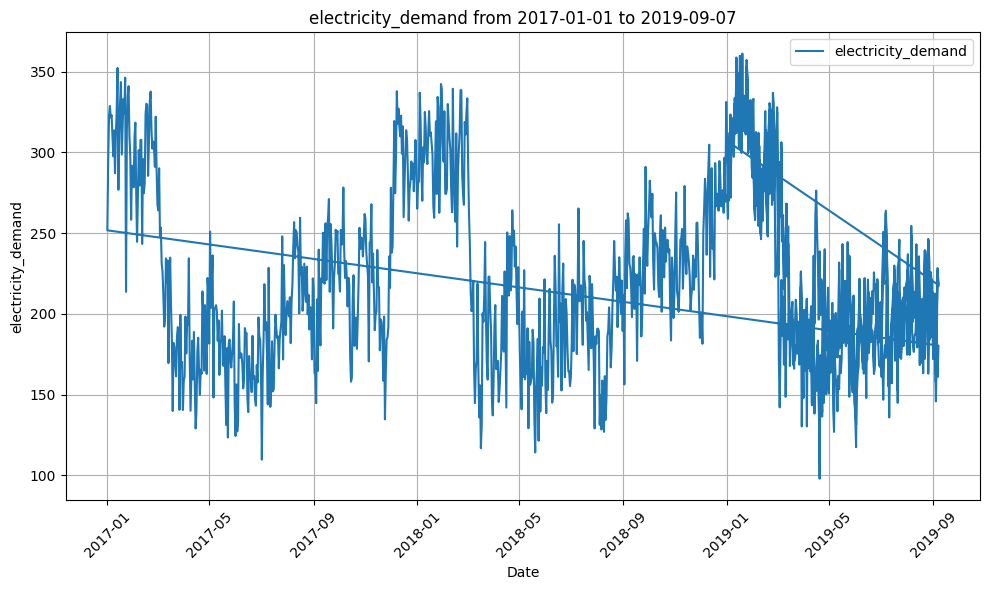

In [21]:
plot_feature_over_time(data, 'electricity_demand', '2017-01-01', '2019-09-07')

In [22]:
data['humidity'] = iqr_outlier_remover(data['humidity'])

Traitement de la colonne 'humidity': 4 outliers remplacés par la médiane (62.52).


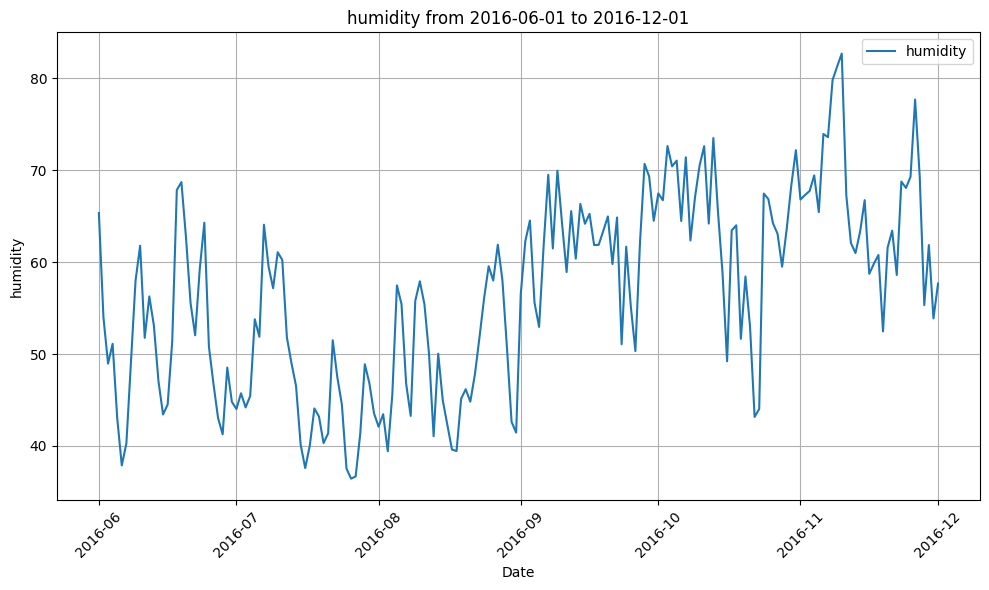

In [23]:
plot_feature_over_time(data, 'humidity', '2016-06-01', '2016-12-01')

### Data Preprocessing Evaluation Strategy

In [24]:
# Provide a complete data preprocessing transformations

In [26]:
# 1. Handle Inconsistencies
def handle_inconsistencies(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 2. Handling Duplicates
def handle_duplicates(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        X_train_no_duplicates = X_train.copy()
        y_train_no_duplicates = y_train.loc[X_train_no_duplicates.index]
        return X_train_no_duplicates, y_train_no_duplicates, X_val.copy()

# 3. Handling Missing Values
def handle_missing_values(X_train, y_train, X_val=None):
    if X_val is not None:
        X_train = X_train.fillna(-1)
        X_val = X_val.fillna(-1)
        return X_train.copy(), X_val.copy()
    else:
        X_train = X_train.fillna(-1)
        return X_train

# 4. Handling Categorical Values
def handle_categorical(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), X_val.copy()
    else:
        return X_train.copy()

# 5. Handling Outliers
def handle_outliers(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 6. Feature Engineering
def feature_engineering(X_train, y_train, X_val=None):
    if X_val is not None:
        return X_train.copy(), y_train, X_val.copy()
    else:
        return X_train.copy(), y_train

# 7. Feature Selection and Dimensionality Reduction
def feature_selection(X_train, y_train, X_val=None):
    selected_columns = ['humidity', 'temperature_station1',
       'temperature_station2', 'temperature_station3', 'temperature_station4',
       'temperature_station5', 'temperature_station6', 'temperature_station7',
       'temperature_station8', 'temperature_station9', 'temperature_station10']
    if X_val is not None:
        return X_train[selected_columns], X_val[selected_columns]
    else:
        return X_train[selected_columns]

In [27]:
def evaluate_pipeline(X, y, n_splits=5):

    ### call transformations here, if there is no learning and no need to be crossval
    X, y = handle_inconsistencies(X, y)
    # X, y = handle_duplicates(X, y)
    X  = handle_missing_values(X, y)
    # X_train = handle_categorical(X, y)
    X, y = handle_outliers(X, y)
    # X, y = feature_engineering(XX, y)
    X = feature_selection(X, y)

    model = LinearRegression()

    tscv = TimeSeriesSplit(n_splits=n_splits)

    train_scores = []
    val_scores = []

    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        print(f"Processing fold {fold + 1}/{n_splits}...")

        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index].copy(), X.iloc[val_index].copy()
        y_train, y_val = y.iloc[train_index].copy(), y.iloc[val_index].copy()

        ### call transformations here, if there is learning
        # X_train, y_train, X_val = handle_inconsistencies(X_train, y_train, X_val)
        X_train, y_train, X_val = handle_duplicates(X_train, y_train, X_val)
        # X_train, X_val = handle_missing_values(X_train, y_train, X_val)
        X_train, X_val = handle_categorical(X_train, y_train, X_val)
        # X_train, y_train, X_val = handle_outliers(X_train, y_train, X_val)
        X_train, y_train, X_val = feature_engineering(X_train, y_train, X_val)
        # X_train, X_val = feature_selection(X_train, y_train, X_val)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_scores.append(train_mse)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_scores.append(val_mse)

        print(f"Fold {fold + 1} Train MSE: {train_mse:.4f}, Validation MSE: {val_mse:.4f}")

    # Compute mean, max, and min values for train and validation MSE
    mean_train_mse = np.mean(train_scores)
    max_train_mse = np.max(train_scores)
    min_train_mse = np.min(train_scores)

    mean_val_mse = np.mean(val_scores)
    max_val_mse = np.max(val_scores)
    min_val_mse = np.min(val_scores)

    # Print results
    print("\nTrain MSE:")
    print(f"Mean: {mean_train_mse:.4f}, Max: {max_train_mse:.4f}, Min: {min_train_mse:.4f}")

    print("\nValidation MSE:")
    print(f"Mean: {mean_val_mse:.4f}, Max: {max_val_mse:.4f}, Min: {min_val_mse:.4f}")

    return mean_val_mse  # Return mean validation MSE as the overall score

In [28]:
# Prepare X and y
X = df_train.copy().drop(columns=['electricity_demand'], axis=1)
y = df_train.copy().pop('electricity_demand')

# Run the evaluation
evaluate_pipeline(X, y)

Processing fold 1/5...
Fold 1 Train MSE: 1198.2910, Validation MSE: 1591.4458
Processing fold 2/5...
Fold 2 Train MSE: 1364.6326, Validation MSE: 1376.3577
Processing fold 3/5...
Fold 3 Train MSE: 1318.7249, Validation MSE: 157358182.6667
Processing fold 4/5...
Fold 4 Train MSE: 39175684.8609, Validation MSE: 99701.3186
Processing fold 5/5...
Fold 5 Train MSE: 31360575.8434, Validation MSE: 44368.0790

Train MSE:
Mean: 14108028.4706, Max: 39175684.8609, Min: 1198.2910

Validation MSE:
Mean: 31501043.9736, Max: 157358182.6667, Min: 1376.3577


np.float64(31501043.97358788)

### Generating Submission File

In [ ]:
# Train and submit your results

In [29]:
# Prepare X_train and y_train from your data
df_train =  pd.read_csv("module5_exercise_train.csv", sep=",")

X_train = df_train.drop(columns=['electricity_demand'], axis=1)
y_train = df_train['electricity_demand']

X_test =  pd.read_csv("module5_exercise_test.csv", sep=",")

In [30]:
def train_and_predict_to_submit(X_train, y_train, X_test):
    model = LinearRegression()

    X_train, y_train, X_test = handle_inconsistencies(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_duplicates(X_train, y_train, X_test)
    X_train, X_test = handle_missing_values(X_train, y_train, X_test)
    X_train, X_test = handle_categorical(X_train, y_train, X_test)
    X_train, y_train, X_test = handle_outliers(X_train, y_train, X_test)
    X_train, y_train, X_test = feature_engineering(X_train, y_train, X_test)
    X_train, X_test = feature_selection(X_train, y_train, X_test)

    # Train the model on the entire training set
    print(f"Training model on entire dataset of shape: {X_train.shape}")
    model.fit(X_train, y_train)

    # Predict on the test set
    print(f"Predicting on test dataset of shape: {X_test.shape}")
    y_test_pred = model.predict(X_test)

    return y_test_pred

In [31]:
# Call serve_model to train and predict
y_test_pred = train_and_predict_to_submit(X_train, y_train, X_test)

Training model on entire dataset of shape: (1909, 11)
Predicting on test dataset of shape: (365, 11)


In [32]:
# Generating Submission File
submission = pd.DataFrame({
    'date': X_test['date'],
    'electricity_demand': y_test_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False, sep=',')
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.
